# Week 3 handin

## Ex 1 Classes

1 - Create 3 classes: Student, DataSheet and Course

2 - A student has a data_sheet and a data_sheet has multiple courses in particular order

3 - Each course has name, classroom, teacher, ETCS and optional grade if course is taken.

4 - In Student create init() so that a Student can be initiated with name, gender, data_sheet and image_url

5 - In DataSheet create a method to get_grades_as_list()

6 - In student create a method: get_avg_grade()

7 - Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
    A - Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade,    img_url
    
8 - Read student data into a list of Students from a csv file:
    A - loop through the list and print each student with name, img_url and avg_grade.
    B - sort the list by avg_grade
    C - create a bar chart with student_name on x and avg_grade on y-axis
    
9 - Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))

10 - Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)
Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

## 02 Status
This exercise seemed pretty hard for me atleast, i found this quite confusing. I have done everything up to 8, still need to do 9 and 10, but have quite a few bugs i cant seem to figure out.

Maybe we could do some livecoding before we get these exercises just to get started, it seemed at bit confusing.

## Ex 1 Classes

In [80]:
import random
import csv
import matplotlib as plt

In [78]:
class Student():
    """In Student create init() so that a Student can be initiated with name, gender, data_sheet and image_url"""
    def __init__(self, name, gender, data_sheet, image_url):
        self.name = name
        self.gender = gender
        self.data_sheet = data_sheet
        self.image_url = image_url
        
    def __repr__(self):
        return '%r, %r, %r, %r' % (self.name, self.gender, self.data_sheet, self.image_url)
            
    def get_avg_grade(self):
        """In student create a method: get_avg_grade()"""
        grades = self.data_sheet.get_grade_as_list()
        return (sum(grades) / len(grades))
        
    

In [79]:
class DataSheet():
    def __init__(self, courses=[]):
        self.courses = courses
        
    def __repr__(self):
        return '(%r)' % (self.courses) 
    
    def get_grade_as_list(self):
        """In DataSheet create a method to get_grades_as_list()"""
        grade_list = []
        for n in self.courses:
            grade_list.append(n.grade)
            return grade_list

In [81]:
class Course():
    def __init__(self, name, classroom, teacher, ETCS, grade):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher 
        self.ETCS = ETCS 
        self.grade = grade
        
    def __repr__(self):
        return '(%r, %r, %r, %r, %r)' % (self.name, self.classroom, self.teacher, self.ETCS, self.grade)
        

In [90]:
"""
Create a function that can generate n number of students with random:
name, gender, courses (from a fixed list of course names), grades, img_url
A - Let the function write the result to a csv file with format:
stud_name, course_name, teacher, ects, classroom, grade,img_url
"""


def gen_students(n):
    c1 = Course('Javascript', 'Zoom', 'Lars', 10, 4)
    c2 = Course('Python', 'Zoom', 'Thomas', 10, 2)
    c3 = Course('Security', 'Zoom', 'Daniel', 10, 10)
    
    names = ['Bent', 'Gert', 'Bjarne', 'Ole', 'Morten', 'Lars', 'Jørgen', 'Lise', 'Kurt', 'Per', 'Åge']
    genders = ['Male', 'Female', 'Unknown']
    courses = [c1, c2, c3]
    img_url = "Img"
    students_list = []
    
    for idx, val in enumerate(range(0, n)):
        student_courses = []
        name = random.choice(names)
        gender = random.choice(genders)
        student_courses.append(random.choice(courses))
        data_sheet = DataSheet(student_courses)
        student = Student(name, gender, data_sheet, img_url)
        students_list.append(student)

      
    with open('students1.csv', 'w') as student_file:
        student_writer = csv.writer(student_file)
        for s in students_list:
            course1 = s.data_sheet.courses[0]
            student_writer.writerow([s.name, s.gender, course1.name, course1.teacher, course1.ETCS, course1.classroom, course1.grade, s.image_url])         

'Åge', 'Female', 'Img', '10'
'Morten', 'Unknown', 'Img', '4'
'Lars', 'Male', 'Img', '10'
'Kurt', 'Unknown', 'Img', '4'
'Lise', 'Unknown', 'Img', '2'
'Bjarne', 'Male', 'Img', '10'
'Jørgen', 'Female', 'Img', '10'
'Lise', 'Male', 'Img', '4'
'Åge', 'Unknown', 'Img', '4'


<IPython.core.display.Javascript object>


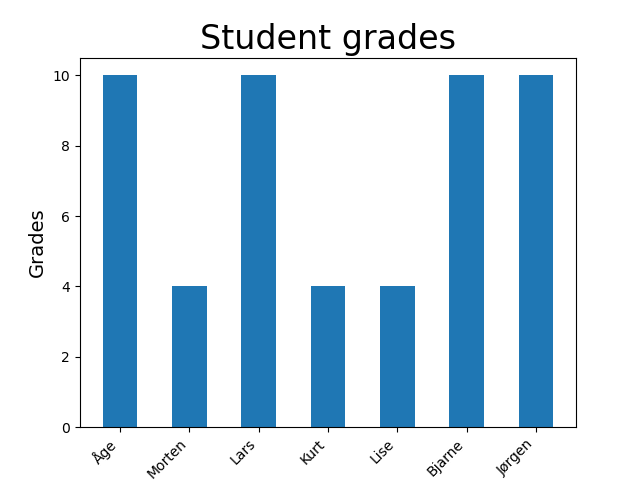

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

In [88]:
"""
Read student data into a list of Students from a csv file:
A - loop through the list and print each student with name, img_url and avg_grade. 
B - sort the list by avg_grade 
C - create a bar chart with student_name on x and avg_grade on y-axis
"""
%matplotlib notebook
import matplotlib.pyplot as plt

def read_csv(file):
    list_of_students = []
    with open(file) as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader)
        for lines in csv_reader:
            s = Student(lines[0], lines[1], lines[7], lines[6])
            list_of_students.append(s)
        
        return list_of_students       
    
new_lst = read_csv("students.csv")

for n in new_lst:
    print(n)
    
x = [student.name for student in lst]
"""Hardcoded, cant access get_avg_grade()"""
y= [10,4,10,4,2,10,10,4,4]

plt.bar(x, y, width=0.5, align='center')

plt.title("Student grades", fontsize=24)
plt.ylabel("Grades", fontsize=14)

plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

In [89]:
"""Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis.
(e.g. make 10 categories from 0-100%)
"""




'Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis.\n(e.g. make 10 categories from 0-100%)\n'